# 6.6- Sourcing & Analyzing Time Series Data

### Content:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import nasdaqdatalink
# statistical models.
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
#Remove scientific notation
pd.options.display.float_format='{:.4f}'.format

In [2]:
#Create data path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A6\24-03-2024 TransferMarkt'

In [3]:
#import data
df = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'revenue-of-english-premier-league-clubs-2011-2024.xlsx'))

In [4]:
df.head(5)

,Year,Commercial,Matchday,Broadcasting,Total
0,2012,620,551,1189,2360
1,2013,749,585,1191,2525
2,2014,897,604,1758,3259
3,2015,987,583,1780,3350
4,2016,1090,622,1927,3639


In [5]:
#Delete columns not necessary for anaysis
uk_rev_df = df.drop (columns = [ 'Commercial','Matchday','Broadcasting'])

The United Kingdom's Premier League holds the total highest market value worth in player value. This made me curious about how much revenue the league was making to be able to attract such high quality (´cream of the crop') market value players. 
* It is important to note here that all values here are in Pounds (GBP) and represent millions (i.e. 620 is in fact GBP 620 000 000.00)

In [6]:
uk_rev_df.shape

(13, 2)

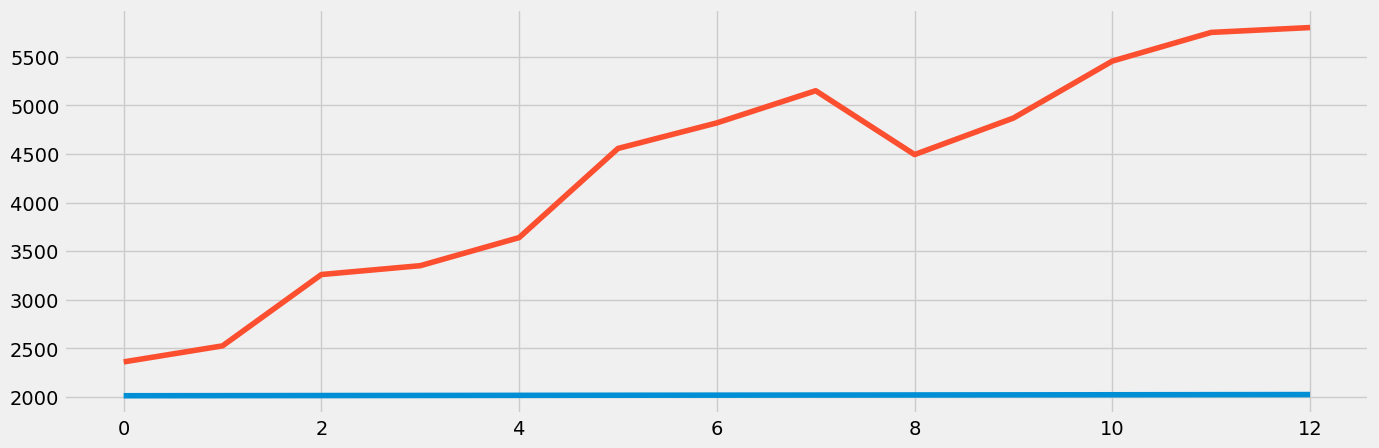

In [7]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(uk_rev_df)

### 2. Subsetting, wrangling, and cleaning time-series data

In [8]:
uk_rev_df.columns

Index(['Year', 'Total'], dtype='object')

In [9]:
uk_rev_df.head(5)

,Year,Total
0,2012,2360
1,2013,2525
2,2014,3259
3,2015,3350
4,2016,3639


In [10]:
# Convert 'Year' column to DatetimeIndex
uk_rev_df['Year'] = pd.to_datetime(uk_rev_df['Year'], format='%Y')

In [11]:
# Set the "Year" column as the index
uk_rev_df.set_index('Year', inplace=True)

In [12]:
uk_rev_df.head()

,Total
Year,
2012-01-01,2360
2013-01-01,2525
2014-01-01,3259
2015-01-01,3350
2016-01-01,3639


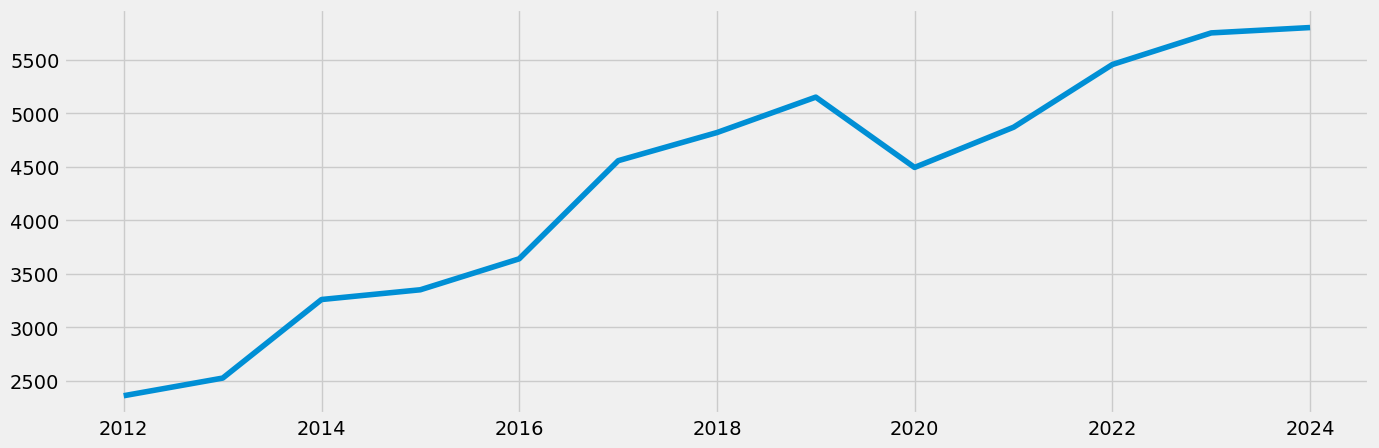

In [13]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(uk_rev_df)

In [14]:
# Check for missing values
uk_rev_df.isnull().sum() 

Total    0
dtype: int64

In [15]:
# Check for duplicates
dups = uk_rev_df.duplicated()
dups.sum()

0

### 3. Time-series analysis: decomposition

In [16]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(uk_rev_df, model='additive')

In [17]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

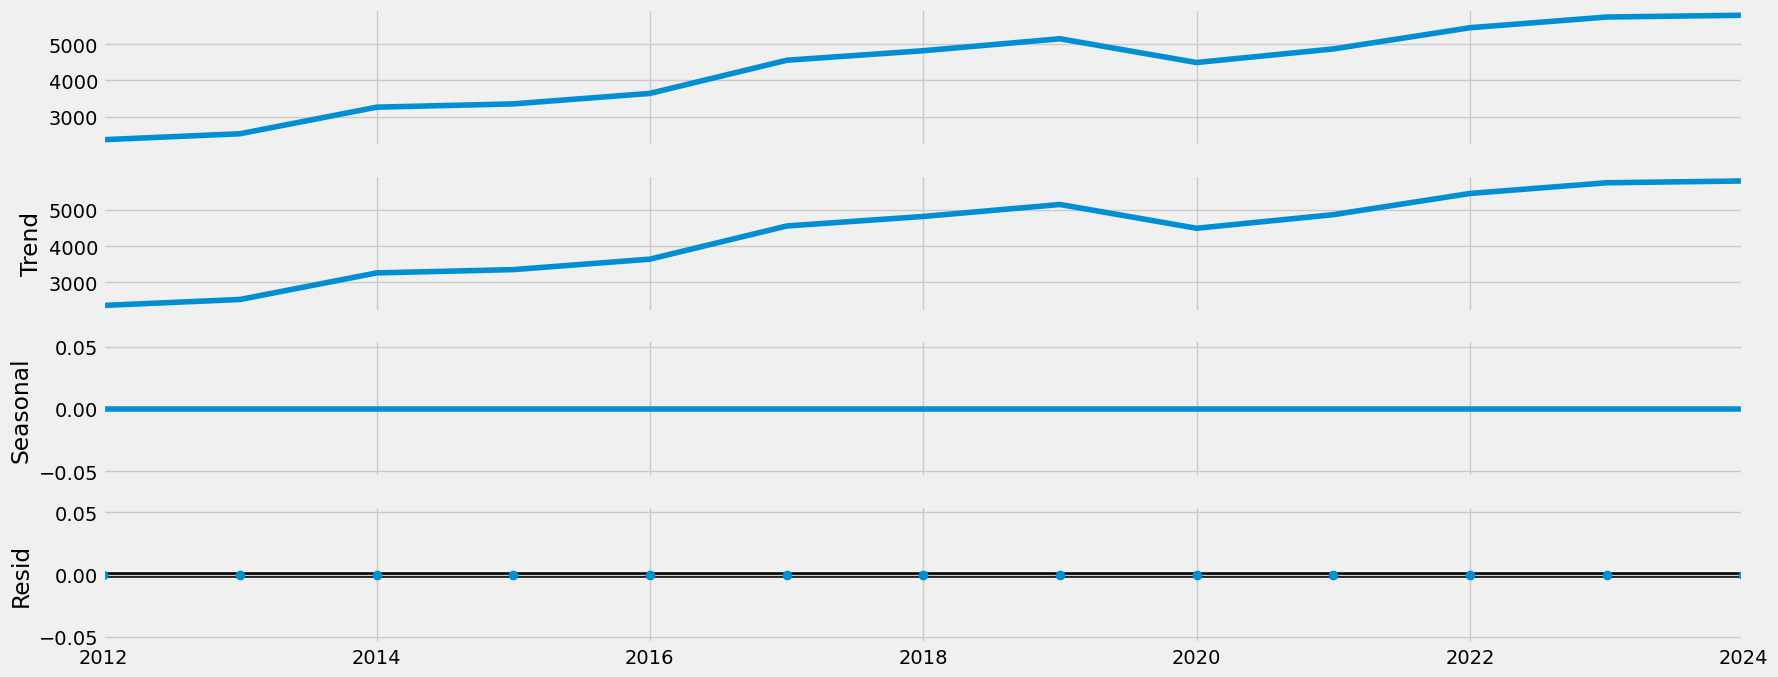

In [18]:
# Plot the separate components
decomposition.plot()
plt.show()

The level and trend show a slow upward trend and has no noise or seasonality trends.
There is a dip during the 2019/2020 period probably due to COVID-19 shutdown laws prohibiting gatherings - but from 2020 the trend continues its upward trend.

### 4. Testing for stationarity


In [29]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(uk_rev_df['Total'])

Dickey-Fuller Stationarity test:
Test Statistic                -5.5953
p-value                        0.0000
Number of Lags Used            4.0000
Number of Observations Used    8.0000
Critical Value (1%)           -4.6652
Critical Value (5%)           -3.3672
Critical Value (10%)          -2.8030
dtype: float64


The time series appears to be stationary. The p-value is 0 and the test statistic is lower than the critical values. The statistical properties of the time series don't change over time making it easier to model and forecast.

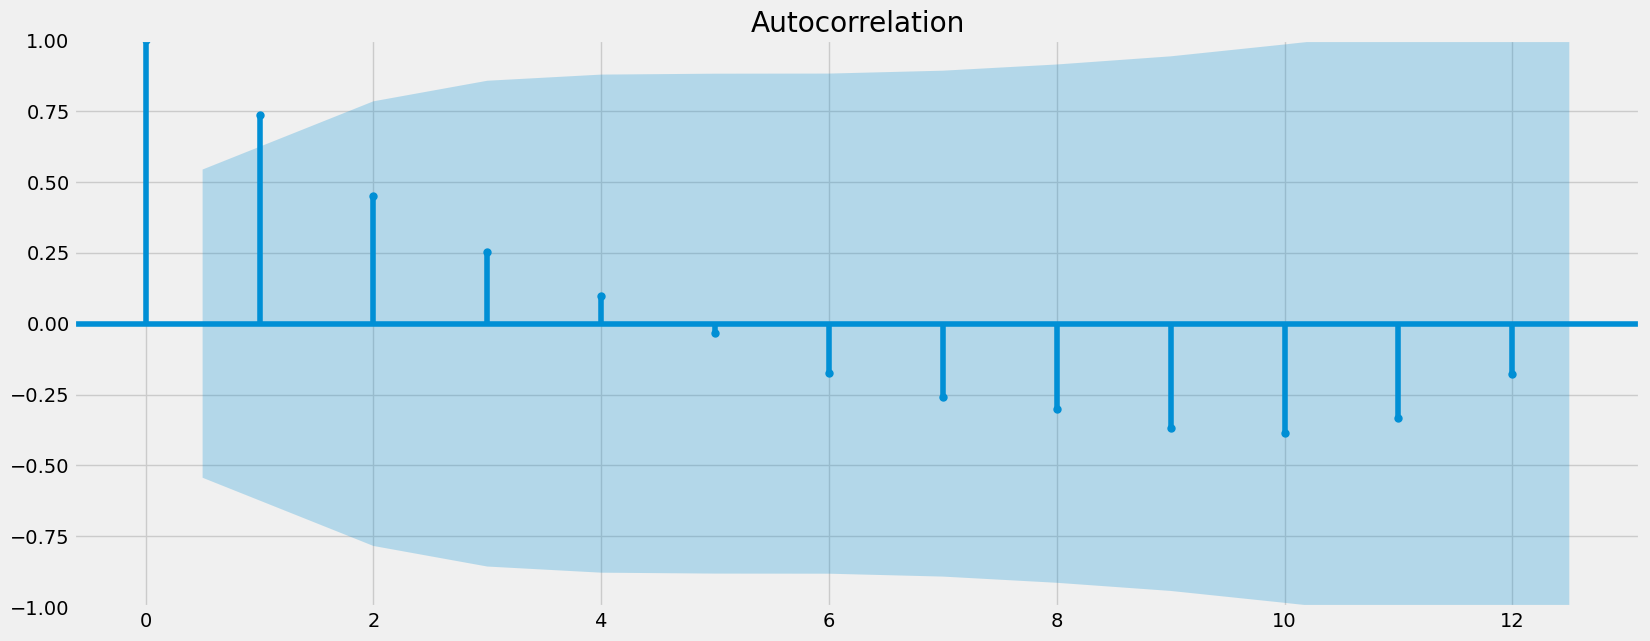

In [28]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(uk_rev_df)
plt.show()

There are two lags outside the blue coffidence zone idicating that the time series is non-stationary and needs to be be made stationary before forecasting.

### 5. Stationarizing the Data

In [31]:
data_diff = uk_rev_df - uk_rev_df.shift(1)

In [32]:
data_diff.dropna(inplace = True)

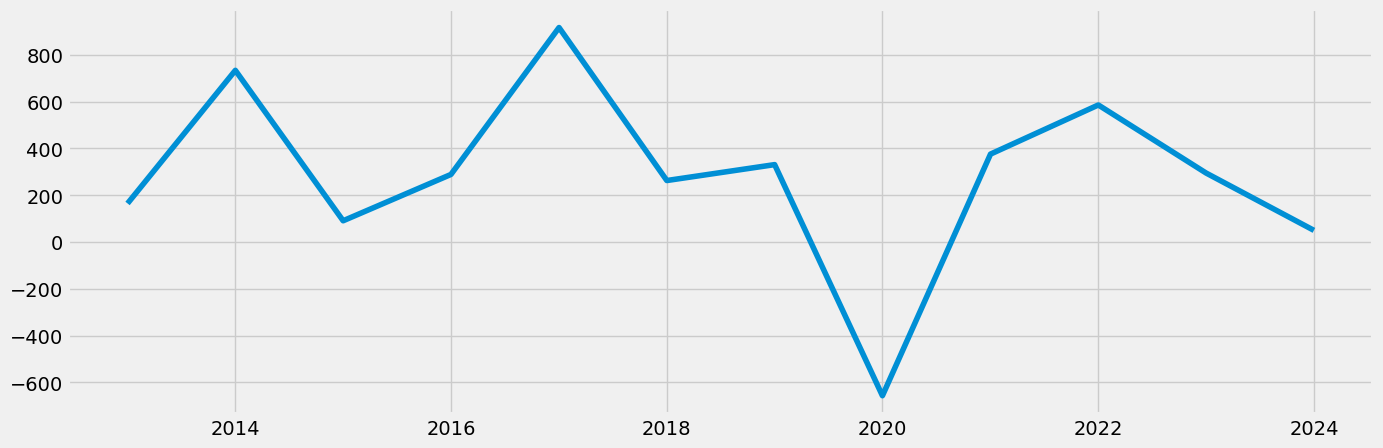

In [33]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -0.4104
p-value                        0.9084
Number of Lags Used            4.0000
Number of Observations Used    7.0000
Critical Value (1%)           -4.9387
Critical Value (5%)           -3.4776
Critical Value (10%)          -2.8439
dtype: float64


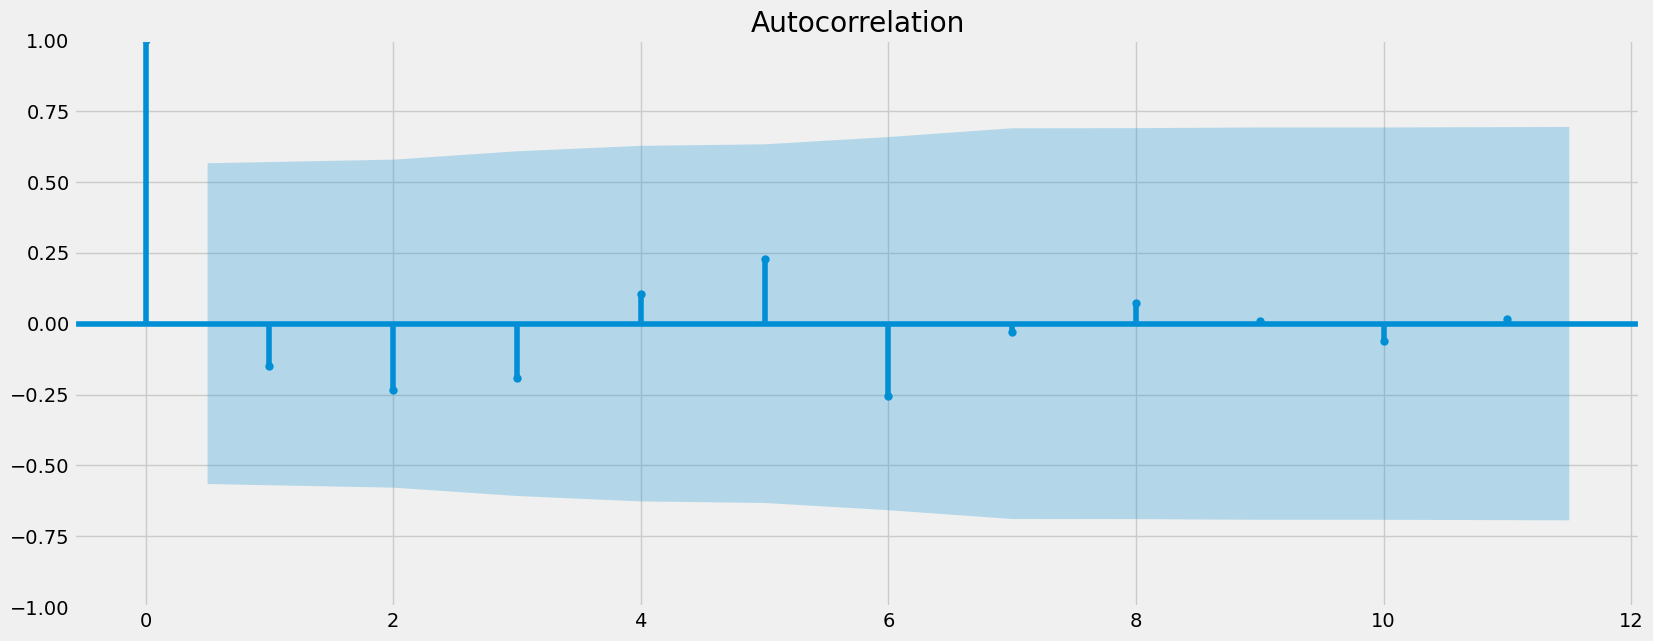

In [35]:
plot_acf(data_diff)
plt.show()

Repeat differencing again as high autocorrelation at one lag suggests non-stationarity

In [36]:
data_diff_2 = data_diff - data_diff.shift(1)

In [37]:
data_diff_2.dropna(inplace = True)

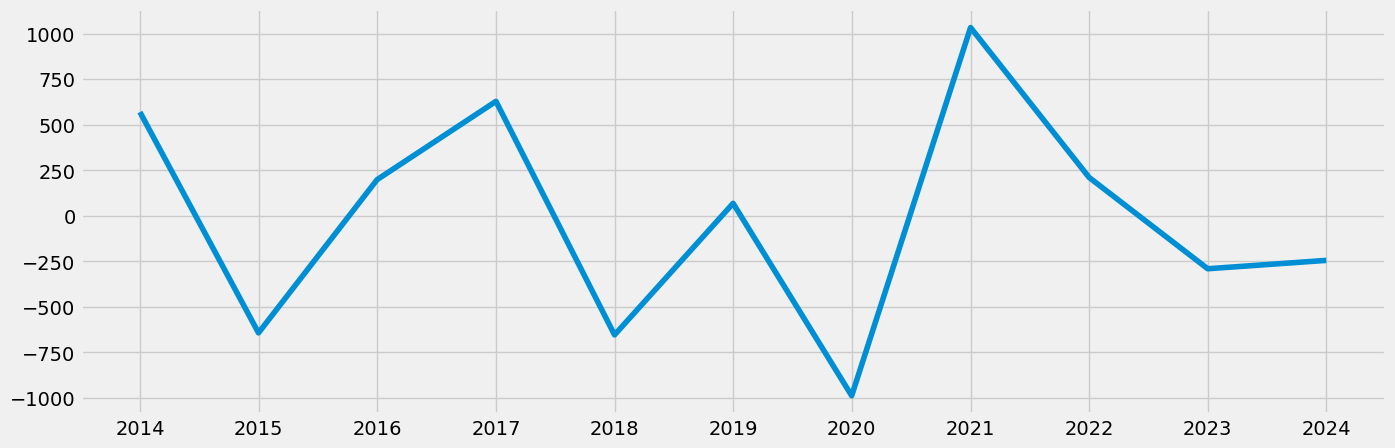

In [38]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [39]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -5.5586
p-value                        0.0000
Number of Lags Used            3.0000
Number of Observations Used    7.0000
Critical Value (1%)           -4.9387
Critical Value (5%)           -3.4776
Critical Value (10%)          -2.8439
dtype: float64


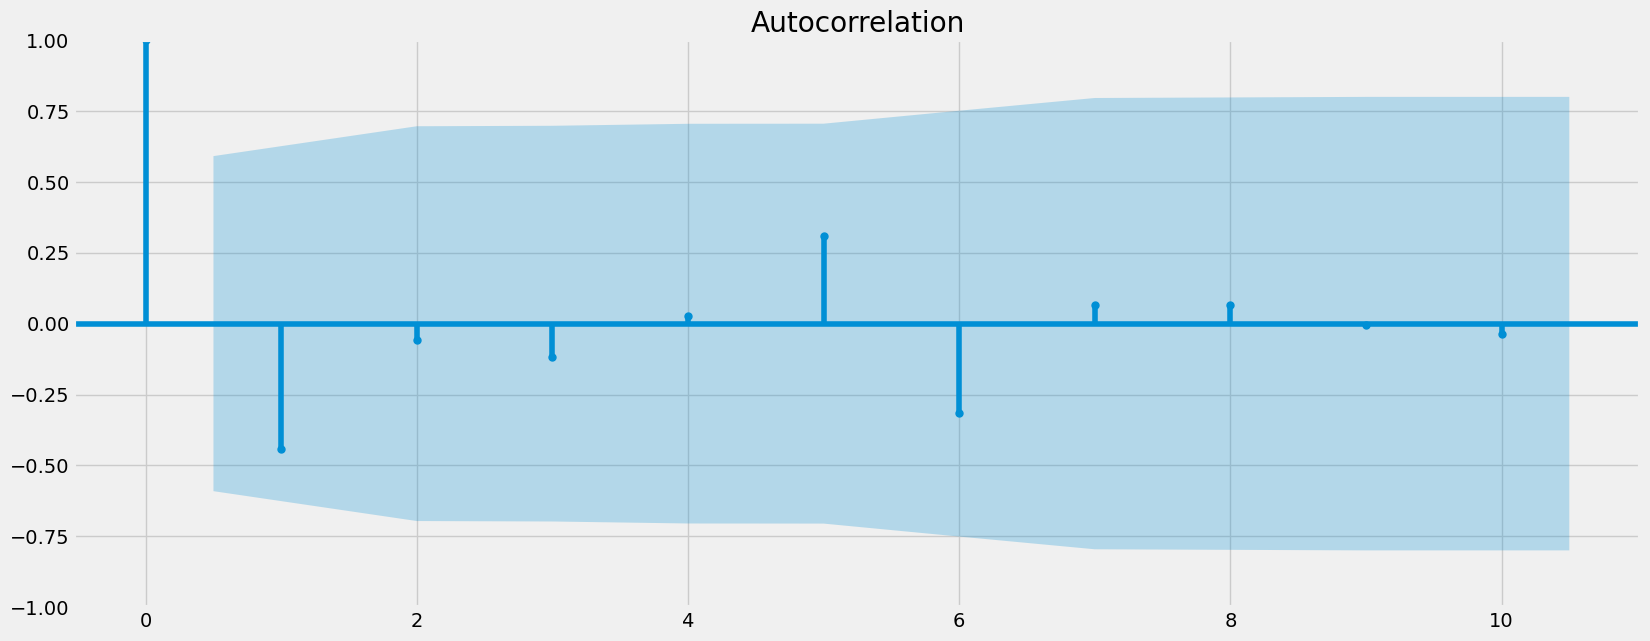

In [40]:
plot_acf(data_diff_2)
plt.show()